In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
from utils import helper

## cases
- normal
- dropout 0.2
- dropout 0.4
- bn conv
- bn dense
- bn both
- bn conv dropout 0.2
- bn dense dropout 0.2
- bn both dropout 0.2
- bn conv dropout 0.4
- bn dense dropout 0.4
- bn both dropout 0.4

In [3]:
configs = []
configs.append(helper.load_config('./config/default.yaml'))
configs.append(helper.load_config('./config/dropout2.yaml'))
configs.append(helper.load_config('./config/dropout4.yaml'))
configs.append(helper.load_config('./config/bn_conv.yaml'))
configs.append(helper.load_config('./config/bn_dense.yaml'))
configs.append(helper.load_config('./config/bn_both.yaml'))
configs.append(helper.load_config('./config/bn_conv_dropout2.yaml'))
configs.append(helper.load_config('./config/bn_dense_dropout2.yaml'))
configs.append(helper.load_config('./config/bn_both_dropout2.yaml'))
configs.append(helper.load_config('./config/bn_conv_dropout4.yaml'))
configs.append(helper.load_config('./config/bn_dense_dropout4.yaml'))
configs.append(helper.load_config('./config/bn_both_dropout4.yaml'))

In [4]:
data = []

In [5]:
def convert_np_array_file(f):
    return np.array(json.load(f))

In [6]:
dirname = 'results/'
filenames = [
    'default.json',
    'dropout_0.2.json',
    'dropout_0.4.json',
    'bn_conv.json',
    'bn_dense.json',
    'bn_both.json',
    'bn_conv_dropout_0.2.json',
    'bn_dense_dropout_0.2.json',
    'bn_both_dropout_0.2.json',
    'bn_conv_dropout_0.4.json',
    'bn_dense_dropout_0.4.json',
    'bn_both_dropout_0.4.json',
]

data = []
for filename in filenames:
    f = open(dirname + filename, 'r')
    data.append(convert_np_array_file(f))
data = np.array(data)

In [7]:
len(data)

12

In [8]:
def running_avg(data: np.array, running_num=10) -> np.array:
    b = np.ones(running_num)/running_num
    return np.convolve(data, b, mode='same')

In [9]:
def print_accuracy(data):
    last_index = len(data)-1
    print('last accuracy: ', data[last_index, 2])

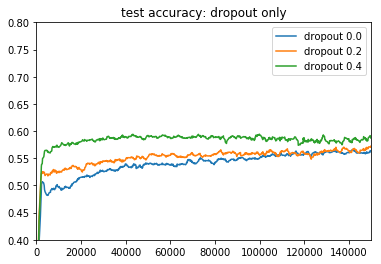

last accuracy:  0.5577999949455261
last accuracy:  0.5590999722480774
last accuracy:  0.5813999772071838


In [10]:
plt.title('test accuracy: dropout only')
plt.plot(data[0, :, 1], running_avg(data[0, :,2]), label='dropout 0.0')
plt.plot(data[1, :,1], running_avg(data[1, :,2]), label='dropout 0.2')
plt.plot(data[2, :,1], running_avg(data[2, :,2]), label='dropout 0.4')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[0])
print_accuracy(data[1])
print_accuracy(data[2])

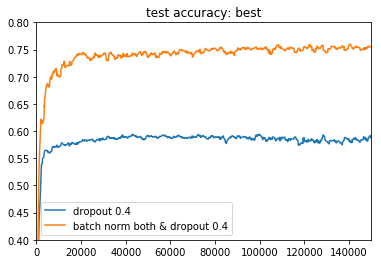

last accuracy:  0.5813999772071838
last accuracy:  0.7612000107765198


In [11]:
plt.title('test accuracy: best')
plt.plot(data[2, :, 1], running_avg(data[2, :,2]), label='dropout 0.4')
plt.plot(data[11, :,1], running_avg(data[11, :,2]), label='batch norm both & dropout 0.4')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[2])
print_accuracy(data[11])

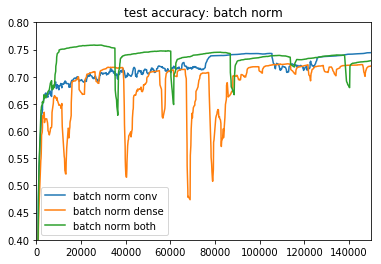

last accuracy:  0.7275000214576721
last accuracy:  0.7222999930381775
last accuracy:  0.7343000173568726


In [12]:
plt.title('test accuracy: batch norm')
plt.plot(data[3, :, 1], running_avg(data[3, :,2]), label='batch norm conv')
plt.plot(data[4, :,1], running_avg(data[4, :,2]), label='batch norm dense')
plt.plot(data[5, :,1], running_avg(data[5, :,2]), label='batch norm both')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[3])
print_accuracy(data[4])
print_accuracy(data[5])

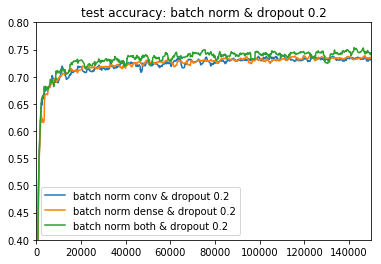

last accuracy:  0.7459999918937683
last accuracy:  0.7343000173568726
last accuracy:  0.7547000050544739


In [13]:
plt.title('test accuracy: batch norm & dropout 0.2')
plt.plot(data[6, :, 1], running_avg(data[6, :,2]), label='batch norm conv & dropout 0.2')
plt.plot(data[7, :,1], running_avg(data[7, :,2]), label='batch norm dense & dropout 0.2')
plt.plot(data[8, :,1], running_avg(data[8, :,2]), label='batch norm both & dropout 0.2')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[6])
print_accuracy(data[7])
print_accuracy(data[8])

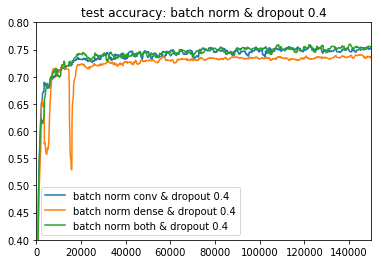

last accuracy:  0.7470999956130981
last accuracy:  0.7354000210762024
last accuracy:  0.7612000107765198


In [14]:
plt.title('test accuracy: batch norm & dropout 0.4')
plt.plot(data[9, :, 1], running_avg(data[9, :,2]), label='batch norm conv & dropout 0.4')
plt.plot(data[10, :,1], running_avg(data[10, :,2]), label='batch norm dense & dropout 0.4')
plt.plot(data[11, :,1], running_avg(data[11, :,2]), label='batch norm both & dropout 0.4')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[9])
print_accuracy(data[10])
print_accuracy(data[11])

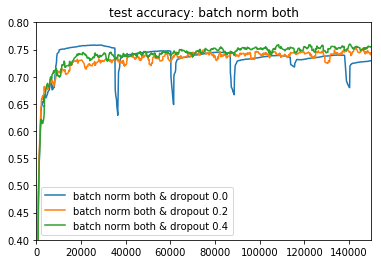

last accuracy:  0.7343000173568726
last accuracy:  0.7547000050544739
last accuracy:  0.7612000107765198


In [15]:
plt.title('test accuracy: batch norm both')
plt.plot(data[5, :, 1], running_avg(data[5, :,2]), label='batch norm both & dropout 0.0')
plt.plot(data[8, :,1], running_avg(data[8, :,2]), label='batch norm both & dropout 0.2')
plt.plot(data[11, :,1], running_avg(data[11, :,2]), label='batch norm both & dropout 0.4')
plt.legend()
plt.ylim(0.4, 0.8)
plt.xlim(0, 150000)
plt.show()
print_accuracy(data[5])
print_accuracy(data[8])
print_accuracy(data[11])